In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata2
import math
import string
import tokenize
import sklearn
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn import metrics
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.naive_bayes import MultinomialNB
from string import digits
from xml.dom import minidom
from unidecode import unidecode
from nltk.stem.snowball import SnowballStemmer
from string import punctuation
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC

stop_words = stopwords.words('spanish')
data=pd.read_csv("ScoreV0.csv")
sbEsp = SnowballStemmer('spanish')
data.head()

,Tweet,Sentiment
0,"Segun el Tribunal Superior de Bogota, el Frent...",0.00
1,@FREDYGUERRAHERR @darcyquinnr @ClaudiaLopez @T...,0.00
2,@FREDYGUERRAHERR @adelve3 @ClaudiaLopez @Trans...,0.01
3,@Americadecali1 Usted es un hijupueta asco. Su...,0.02
4,@LaCrestaNoSeCae Ese malparido que se devuelve...,0.02


In [2]:
data.Sentiment.value_counts()

0.33    104
0.25     84
0.28     83
0.23     78
0.38     78
       ... 
0.07      1
0.05      1
0.85      1
0.84      1
0.91      1
Name: Sentiment, Length: 92, dtype: int64

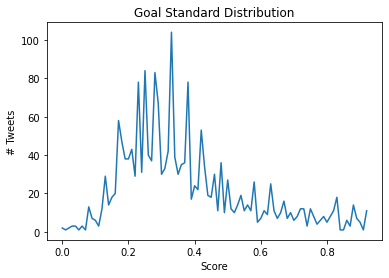

In [3]:
Sentiment_count=data.groupby('Sentiment').count()
fig, ax = plt.subplots()
ax.plot(Sentiment_count)
ax.set(xlabel='Score', ylabel='# Tweets',
       title='Goal Standard Distribution')
fig.savefig("distGoldStandard.png")
plt.show()

In [5]:
def strip_links(text):
    text = text.lower()
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')   
    return text

# Eliminación de Hashtags y menciones
def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

# Eliminación de puntuacion, numeros y conversión del texto a minúsculas
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    for digits in string.digits:
        text = text.replace(digits,'')
    text = text.lower()
    return text

#Normalizar: eliminar diéresis, acentos, y otros caracteres similares.
def normunicode_data(strin):
    #print(strin)
    return unicodedata2.normalize('NFKD', strin).encode('ASCII', 'ignore').decode("utf-8").lower()

def proc_str(strin):
    return remove_punct(normunicode_data(strin));

def tok_cln(text):
    return set(nltk.wordpunct_tokenize(text)).difference(sw) #(este es el original)
    #return nltk.wordpunct_tokenize(text).difference(sw)

def preprocessing(text):
    text= text.apply(strip_links)
    text= text.apply(strip_all_entities)
    text= text.apply(remove_punctuations)
    text = text.apply(normunicode_data)
#    text = text.apply(tok_cln)
    return text

#data_clean = pd.DataFrame(preprocessing(data["Tweet"]))
data.Tweet=preprocessing(data["Tweet"])
data.head()

,Tweet,Sentiment
0,segun el tribunal superior de bogota el frente...,0.00
1,drogos inmundos basofias sociales vandalos inm...,0.00
2,que hpta desorden de ciudad ya aqui todos hace...,0.01
3,usted es un hijupueta asco su mentalidad asesi...,0.02
4,ese malparido que se devuelve yo lo vi en otra...,0.02


In [10]:
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))

def tokenize(text):
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)
    return tokens

cv = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize,
                lowercase = True,
                stop_words = stop_words)

#tokenizer to remove unwanted elements from out data like symbols and numbers
text_counts= cv.fit_transform(data['Tweet'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [12]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes


In [20]:
print(y_test)

1385    0.43
1279    0.41
1123    0.36
1666    0.60
1094    0.36
        ... 
332     0.21
1       0.00
661     0.28
1071    0.35
142     0.17
Name: Sentiment, Length: 581, dtype: float64
